### DATA@ANZ PROGRAMME 
#### Task 1: Exploratory data anlysis
Clean, Segment the dataset and Draw unique insights, including the visulization of the transaction volumne
and accessing the effects of outliers

##### 1. Import dataset

In [64]:
# load the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

In [65]:
# Load the dataset
data = pd.read_excel(r"C:\Users\sonef\Downloads\ANZ synthesised transaction dataset.xlsx")
data.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [67]:
data.shape

(12043, 23)

##### 2. Basic check 

In [68]:
# Check to see if the number of unique customers is 100
data.customer_id.nunique()

100

In [69]:
print("Number of rows in the dataset and Number of unique transaction ID are respectively: \n",len(data), data.transaction_id.nunique())

Number of rows in the dataset and Number of unique transaction ID are respectively: 
 12043 12043


The number of unique transaction Id equals the number of row. Which means there is no duplicate transactions. 

In [70]:
# check the length of date
data.date.describe()

count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

We have three month of data, the starting date is 2018-08-01, and the ending sate is 2018-10-31. bb

In [71]:
# Examine if there is missing days without any transaction
pd.date_range(start = '2018-08-01', end = '2018-10-31').difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

Transaction for the day 2018-08-16 is missing. 

In [72]:
# Null values 
missing = data.isnull().sum()
missing = missing[missing > 0]
missing

card_present_flag     4326
bpay_biller_code     11158
merchant_id           4326
merchant_code        11160
merchant_suburb       4326
merchant_state        4326
merchant_long_lat     4326
dtype: int64

In [73]:
# Examine numeric variables
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


There is no anomalies age value. 
We can see that ariables in balance and amount column vary greatly
##### 3. Data exploratory

We will skip the following columns as they are mainly identifiers
- bpay_biller_code
- merchant_id
- merchant_code
- account
- first_name
- transaction_id
- customer_id

In [74]:
data.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [75]:
# Status
data.status.describe()
data.status.value_counts(dropna = False)


authorized    7717
posted        4326
Name: status, dtype: int64

Status of individual transaction: 
authorized: proved transaction
posted: transaction is still in the process

In [76]:
# Card present flag
data.card_present_flag.describe()
data.card_present_flag.value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

A card-not-present transaction is a payment card transaction made where the cardholder does not or cannot physically present the card for a merchant's visual examination at the time that an order is given and payment effected

In [77]:
# Currency 
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

All the transactions are made in AUD

In [78]:
# long-lat : longtitude and latitude of transaction 
data.long_lat.value_counts(dropna=False)

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

In [79]:
# txn_description : transaction description
data.txn_description.value_counts(dropna=False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Text(0.5, 1.0, 'Transaction number by caterogy')

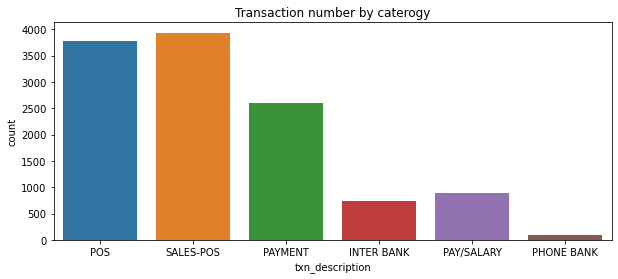

In [80]:
plt.figure(figsize = (10,4))
sns.countplot(data.txn_description);
plt.title("Transaction number by caterogy")

In [81]:
mean_txndescription = data[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean()
mean_txndescription.sort_values(by = "amount", ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average amount of transaction per category')

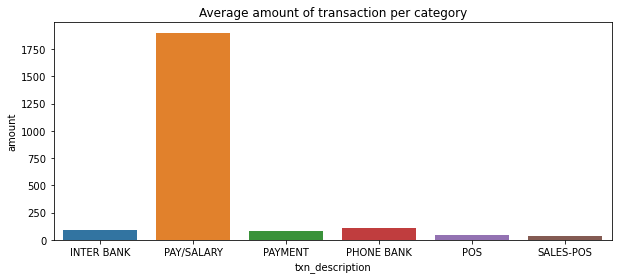

In [82]:
plt.figure(figsize = (10,4))
sns.barplot(x = "txn_description", y = "amount", data = mean_txndescription);
plt.title("Average amount of transaction per category")

Pay/Salary has the highest average transaction amount. 

In [83]:
# Gender
data.gender.value_counts(dropna=False)

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'Transaction number by Gender')

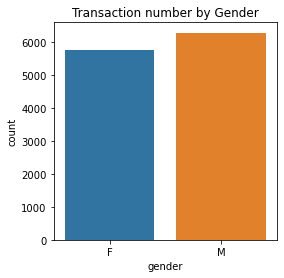

In [84]:
plt.figure(figsize=(4,4))
sns.countplot(data.gender);
plt.title("Transaction number by Gender")

In [85]:
# Merchant State
data.merchant_state.value_counts(dropna=False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0.5, 1.0, 'Transaction number by States')

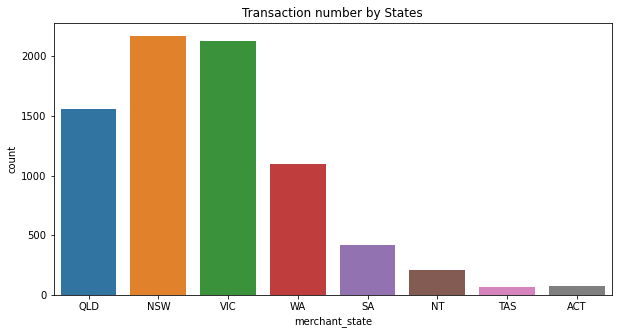

In [86]:
plt.figure(figsize = (10,5))
sns.countplot(data.merchant_state);
plt.title("Transaction number by States")

In [87]:
data[["merchant_state", "amount"]].groupby("merchant_state", as_index=False).mean().sort_values(by = "amount", ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction amount by States')

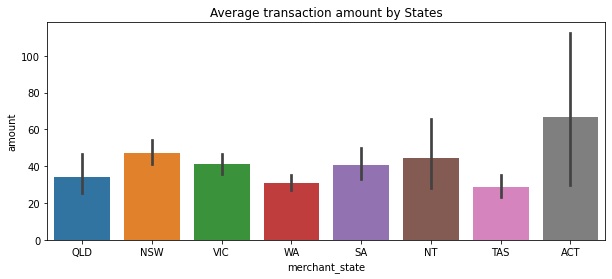

In [88]:
plt.figure(figsize = (10,4))
sns.barplot(x = "merchant_state", y = "amount", data = data);
plt.title("Average transaction amount by States")

In [89]:
# Extraction 
data.extraction.describe

<bound method NDFrame.describe of 0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object>

As we already have the date column, we can only extract the time and put it in a new column 

In [90]:
# country
data.country.value_counts()

Australia    12043
Name: country, dtype: int64

The country of transaction is Australia. We can remove this columns as it provide no additional information

In [91]:
# merchant_long_lat movement
data.merchant_long_lat.value_counts()

151.21 -33.87    145
144.96 -37.82     85
144.97 -37.81     59
144.96 -37.81     56
153.02 -27.47     46
                ... 
150.73 -34.04      1
130.99 -25.24      1
143.92 -35.73      1
150.99 -33.85      1
145.69 -16.84      1
Name: merchant_long_lat, Length: 2703, dtype: int64

In [92]:
# movement
data.movement.value_counts(dropna=False)

debit     11160
credit      883
Name: movement, dtype: int64

Text(0.5, 1.0, 'Transaction numbers by movement')

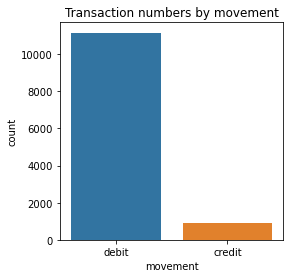

In [93]:
plt.figure(figsize = (4,4))
sns.countplot(data.movement)
plt.title("Transaction numbers by movement")

In [94]:
data[["amount", "movement"]].groupby("movement", as_index=False).mean()

,movement,amount
0,credit,1898.728029
1,debit,52.572343


Text(0.5, 1.0, 'Average transaction amount by movement')

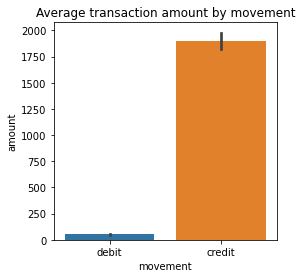

In [95]:
plt.figure(figsize=(4,4))
sns.barplot(x = "movement", y = "amount", data = data)
plt.title("Average transaction amount by movement")

As we can see, most of the transactions are debit transactions. However, the average amount of debit transaction is significantly lower than credit transactions.

##### 4. Dealing with null values

In [96]:
# merhcant id
data.merchant_id.value_counts(dropna=False)
missing_percent = round(missing/ len(data) * 100, 2)
pd.DataFrame({"missing_num":missing, "percentage":missing_percent}).sort_values(by = "percentage", ascending = False)

,missing_num,percentage
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
card_present_flag,4326,35.92
merchant_id,4326,35.92
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


In [97]:
data.shape
# We drop the merchant_code and bpay_biller_code column as they have more than 92 % missing data
data = data.drop(["merchant_code", "currency", "country","bpay_biller_code"], axis= 1)

In [98]:
# Many transaction are purchased-related. We look into the transaction from merchant
data.head(5)
merchant_data = data.loc[(data.txn_description != "POS") | (data.txn_description != "SALES-POS")] 
merchant_data.isnull().sum().sort_values(ascending=False)

merchant_suburb      4326
merchant_long_lat    4326
merchant_id          4326
merchant_state       4326
card_present_flag    4326
status                  0
customer_id             0
transaction_id          0
amount                  0
extraction              0
gender                  0
age                     0
date                    0
balance                 0
first_name              0
txn_description         0
long_lat                0
account                 0
movement                0
dtype: int64

In [99]:
# We fill null data with n/a
nul_cols = ["merchant_suburb", "merchant_long_lat", "merchant_id","merchant_state", "card_present_flag"]
for i in nul_cols:
    data[i].replace(np.nan, "n/a", inplace= True)

# Recheack the null value
data.isnull().sum().max()

0

##### Draw some insights about transactions per months, days, hours

In [100]:
daily_txn_amount = pd.DataFrame(data.groupby("date").amount.sum()).reset_index()
daily_txn_amount.head(5)

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


Text(0.5, 1.0, 'Daily transaction amount')

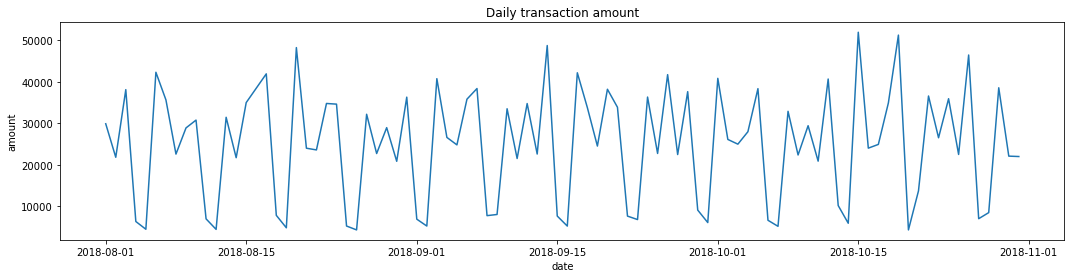

In [101]:
# Plot the daily transaction amount
plt.figure(figsize = (18,4))
sns.lineplot(x = "date", y = "amount", data = daily_txn_amount)
plt.title("Daily transaction amount")

We can see a cyclical pattern in daily amount of transaction. There might be some assumptions for this trends:
- Paydate usually falls on certain days of month/week
- People tend to spend more after the days they recieve their salary, or on weekends
To take a furthur look, we will exmaine transaction amount by days and hours

In [102]:
# Get the date of week and date of month from the date column
data["day_of_week"] = pd.DatetimeIndex(data.date).dayofweek
# Day of week from 0 to 6 with 0 is Monday
data["month"] = pd.DatetimeIndex(data.date).month

In [103]:
# Extract the time form extraction columns
data["extraction"] = [x.split("T")[1].split(".")[0] for x in data.extraction]
data["hour"] = [x.split(":")[0] for x in data.extraction]
data.head(5)

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,day_of_week,month,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,2,8,01
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,2,8,01
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,2,8,01
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,2,8,01
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,2,8,01


##### 5.Some insights with visualization

Text(0.5, 1.0, 'Average amount per transaction by month')

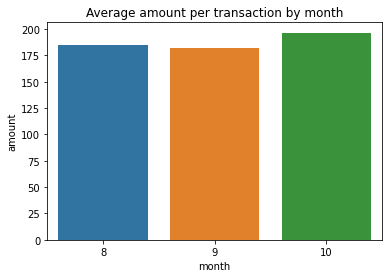

In [178]:
# Average transaction volumne per month
month_volume =pd.DataFrame(data[["month", "amount"]].groupby("month").amount.mean()).reset_index()
month_volume
# Visualize 
plt.figure(figsize = (6,4))
sns.barplot(x = "month", y = "amount", data = month_volume)
plt.title("Average amount per transaction by month")


In [204]:
# Average transaction amount per day of week 
weekly_volume = pd.DataFrame(data.groupby("day_of_week").amount.mean()).reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Firday", "Saturday", "Sunday"]
weekly_volume["day_of_week"] = day_order
weekly_volume

,day_of_week,amount
0,Monday,373.221000
1,Tuesday,221.576456
2,Wednesday,195.215570
3,Thursday,184.010422
4,Firday,249.353517
5,Saturday,54.419286
6,Sunday,53.015845


Text(0.5, 1.0, 'Average daily transaction volumne')

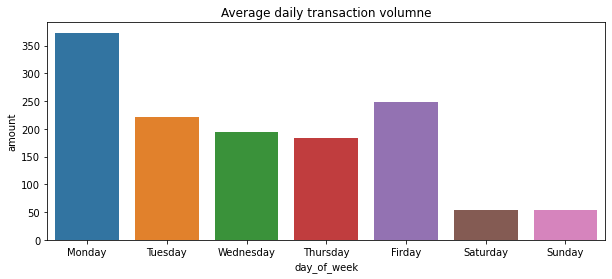

In [206]:
# Visualize
plt.figure(figsize = (10,4))
sns.barplot(x = "day_of_week", y = "amount", data = weekly_volume)
plt.title("Average daily transaction volumne")

Monday has the highest transaction volume of the week, and is significantly higher than the 2nd day - Thurday
Saturday and Sunday have the lowest transaction volume. 

In [180]:
# Number of transaction per day of week by diffirent payment category
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [181]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "salary"
data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "category"] = "purchase"
data.category.fillna("other", inplace= True)
# recheck
data.loc[data.txn_description == "POS", "category"].head(1)

0    purchase
Name: category, dtype: object

In [210]:
weekly_txn = pd.DataFrame(data.groupby(["day_of_week", "category"]).amount.count()).unstack(level = 1)
weekly_txn.head(3)

amount                
category     other purchase salary
day_of_week                       
0            411.0    742.0  207.0
1            486.0    841.0  160.0
2            640.0   1251.0  172.0

Text(0.5, 1.0, 'Number of transactions per day of week by category')

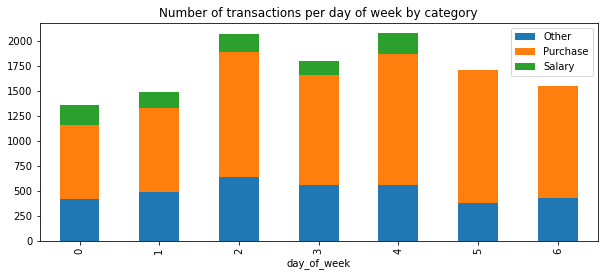

In [208]:
weekly_txn.plot(kind = 'bar', stacked = True, figsize = (10,4))
plt.legend(["Other", "Purchase", "Salary"])
plt.title("Number of transactions per day of week by category")



Salary is not paid on Saturday and Sunday. This explain the transaction amount volumne for that days are significantly lower than the other days of the week

In [184]:
# Transactions per hours
hourly_txn = pd.DataFrame(data.groupby("hour").amount.mean()).reset_index()
hourly_txn.head(3)

,hour,amount
0,00,28.274907
1,01,48.716402
2,02,75.269764


<AxesSubplot:xlabel='hour', ylabel='amount'>

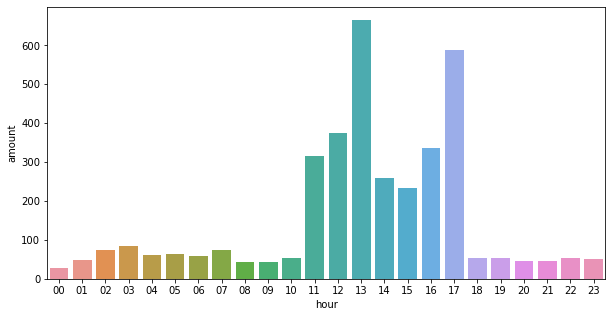

In [185]:
# Visualize 
plt.figure(figsize = (10,5))
sns.barplot(x = "hour", y = "amount", data = hourly_txn)

Highest transaction volumns happen after noon time at 13:00 - 14:00 and late in the afternoon at 17:00-18.00

In [186]:
# Lets break down the transaction by category
hourly_txn = pd.DataFrame(data.groupby(["hour","category"]).amount.count()).unstack(level = 1).reset_index()
hourly_txn.head(3)

hour amount                
category       other purchase salary
0          00    NaN    108.0    NaN
1          01    NaN    214.0    NaN
2          02  117.0     95.0    NaN

(0.0, 1300.0)

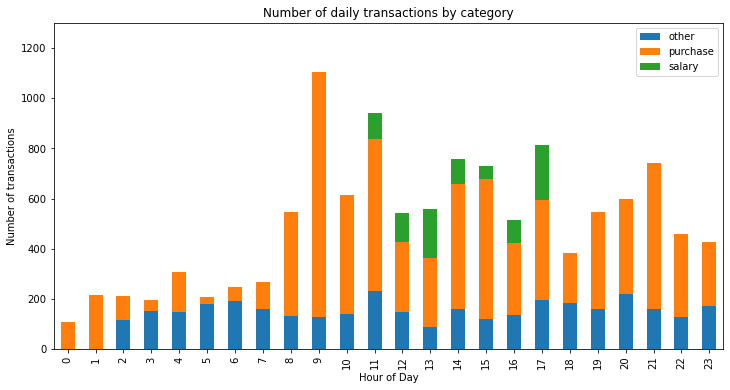

In [187]:
# Visualize 
hourly_txn.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.legend(["other", "purchase", "salary"])
plt.title("Number of daily transactions by category")
plt.xlabel("Hour of Day")
plt.ylabel("Number of transactions")
plt.ylim((0,1300))

Salary transactions happen on certain time of the day, from 11am to 17pm. This can explain why that same hour range of the day has higher transaction amount than others. 

9 am is the time of day that has highest number of transactions. At this time, many people go to work, or go out for morning cafe and breakfast. 